##Setting Up Data

In [1]:
pip install gdown==v4.6.3


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:


!gdown --id 1nOWmrjtp7ErpfAhIU-NfduORIB_mPA28
!mkdir data
!unzip '/content/extracted_images.zip' -d '/content/data/'
!rm -r extracted_images.zip



Streaming output truncated to the last 5000 lines.
  inflating: /content/data/extracted_images/mul/153.jpg  
  inflating: /content/data/extracted_images/mul/154.jpg  
  inflating: /content/data/extracted_images/mul/155.jpg  
  inflating: /content/data/extracted_images/mul/156.jpg  
  inflating: /content/data/extracted_images/mul/157.jpg  
  inflating: /content/data/extracted_images/mul/158.jpg  
  inflating: /content/data/extracted_images/mul/159.jpg  
  inflating: /content/data/extracted_images/mul/16.jpg  
  inflating: /content/data/extracted_images/mul/160.jpg  
  inflating: /content/data/extracted_images/mul/161.jpg  
  inflating: /content/data/extracted_images/mul/162.jpg  
  inflating: /content/data/extracted_images/mul/163.jpg  
  inflating: /content/data/extracted_images/mul/164.jpg  
  inflating: /content/data/extracted_images/mul/165.jpg  
  inflating: /content/data/extracted_images/mul/166.jpg  
  inflating: /content/data/extracted_images/mul/167.jpg  
  inflating: /content/

##Data Processing Pipeline


###Data Generators


In [3]:

from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
import time


In [4]:

data_gen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,rescale=1./255 ,validation_split=0.2)

path_to_data = '/content/data/extracted_images/'

training_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="training" ,color_mode='grayscale')

validation_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="validation",color_mode='grayscale')



Found 6701 images belonging to 13 classes.
Found 1669 images belonging to 13 classes.


##Exploring The Dataset

In [5]:
print(training_dataset.class_indices)
labels = ["divide" , "eight","five","four","min","mul","nine","one","plus","seven","six","three","two"]


{'div': 0, 'eight': 1, 'five': 2, 'four': 3, 'min': 4, 'mul': 5, 'nine': 6, 'one': 7, 'plus': 8, 'seven': 9, 'six': 10, 'three': 11, 'two': 12}


##Visualize Data

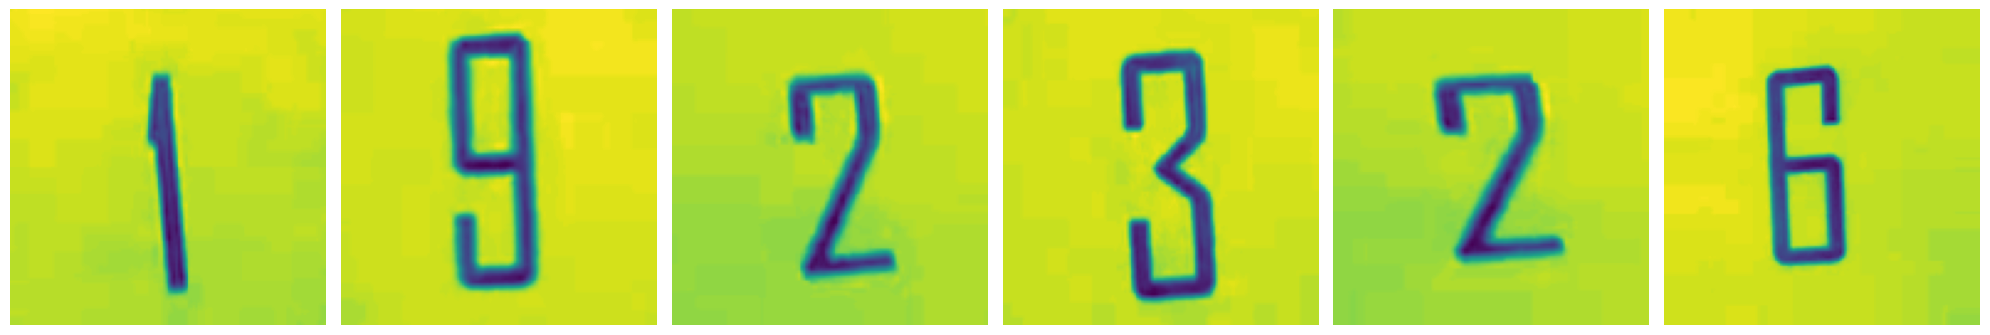

In [6]:


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
training_images, _ = next(training_dataset)
plotImages(training_images[:6])




##Implementing the Model


In [7]:
# initialising the CNN
visual_calculator_model = Sequential()

# convolution to extract features from images
visual_calculator_model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
visual_calculator_model.add(Conv2D(64, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(128, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(256, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
visual_calculator_model.add(Flatten())
visual_calculator_model.add(Dense(units = 1024, activation = 'relu'))
visual_calculator_model.add(Dense(units = 13, activation = 'softmax'))

# compiling the CNN
visual_calculator_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
visual_calculator_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
history = visual_calculator_model.fit(training_dataset , epochs =15 ,validation_data= validation_dataset, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2) )

Epoch 1/15
210/210 [==============================] - 39s 146ms/step - loss: 0.9145 - accuracy: 0.6996 - val_loss: 0.2228 - val_accuracy: 0.9383
Epoch 2/15
210/210 [==============================] - 18s 84ms/step - loss: 0.0413 - accuracy: 0.9900 - val_loss: 0.0798 - val_accuracy: 0.9838
Epoch 3/15
210/210 [==============================] - 18s 85ms/step - loss: 0.0179 - accuracy: 0.9960 - val_loss: 0.1054 - val_accuracy: 0.9790
Epoch 4/15
210/210 [==============================] - 19s 89ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.1080 - val_accuracy: 0.9814
Epoch 4: early stopping


In [9]:
visual_calculator_model.save("/content/vc_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
visual_calculator_model.save_weights("/content/vc_model.hdf5")

##Testing Model

## Prediction - Accuracy

float32
(128, 128, 1)
(1, 128, 128, 1)
1/1 [==============================] - 0s 17ms/step
Model Predictions : divide 



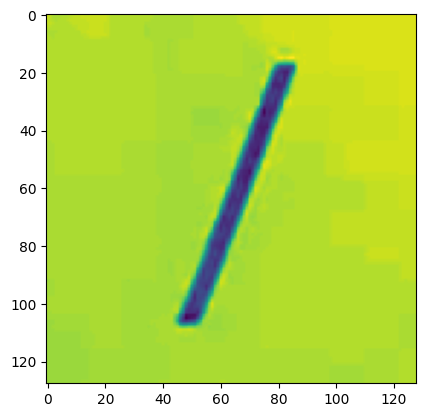

In [30]:
testing_image = image.load_img('/content/data/extracted_images/div/10.jpg', color_mode="grayscale",target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
print(testing_image.dtype)
print(testing_image.shape)

testing_image = np.expand_dims(testing_image , axis=0)
print(testing_image.shape)
prediction_result = visual_calculator_model.predict(testing_image)
print("Model Predictions :", labels[np.argmax(prediction_result)] , "\n" )


##LOSS - Validation Metrices

In [20]:


history.history



{'loss': [0.9144731163978577,
  0.041311126202344894,
  0.01794673688709736,
  0.005570405162870884],
 'accuracy': [0.6995970606803894,
  0.9900014996528625,
  0.9959707260131836,
  0.9989553689956665],
 'val_loss': [0.22276559472084045,
  0.07976672053337097,
  0.10536905378103256,
  0.10799024999141693],
 'val_accuracy': [0.9382864236831665,
  0.9838226437568665,
  0.9790293574333191,
  0.9814260005950928]}

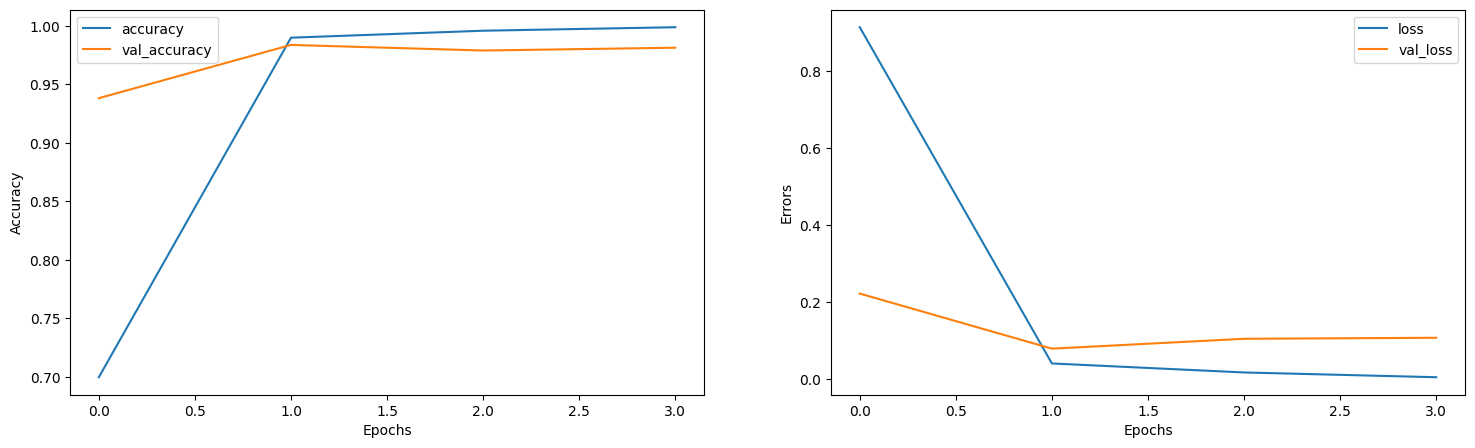

In [21]:


loss_plotter = plt.figure(figsize=(18,5))
mse_plot  = loss_plotter.add_subplot(121)
mse_plot_1  = loss_plotter.add_subplot(122)

mse_plot_1.plot(history.epoch,history.history["loss"],history.history["val_loss"] )
mse_plot_1.set_xlabel("Epochs")
mse_plot_1.set_ylabel('Errors')
mse_plot_1.legend(["loss","val_loss"])


mse_plot.plot(history.epoch,history.history["accuracy"],history.history["val_accuracy"])
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel('Accuracy')
mse_plot.legend(["accuracy","val_accuracy"])



##TF Lite


#### Conversion

In [22]:


converter = tf.lite.TFLiteConverter.from_keras_model(visual_calculator_model)
converter.optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
tflite_model = converter.convert()



In [23]:
open("vc_model.tflite","wb").write(tflite_model)

39362244

####Size Comparison

In [24]:
open("vc_model.tflite","wb").write(tflite_model)
print("Main Model Size :" , round((os.path.getsize("/content/vc_model.h5"))/(1024*1024) ,3 ) , "MB")
print("Lite Model Size :" , round((os.path.getsize("/content/vc_model.tflite"))/(1024*1024),3 ), "MB"  )


Main Model Size : 112.658 MB
Lite Model Size : 37.539 MB


####TF Lite Prediction

In [25]:
interpreter = tf.lite.Interpreter('/content/vc_model.tflite')

input_details   = interpreter.get_input_details()
output_details = interpreter.get_output_details()


print(input_details)

print("-"*10)
print(output_details)
print("-"*10)
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])


[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 13], dtype=int32), 'shape_signature': array([-1, 13], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
Input Shape: [  1 128 128   1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 13]
Output Type: <class 'numpy.float32'>


In [31]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'] , testing_image)
interpreter.invoke()

tflite_prediction_result = interpreter.get_tensor(output_details[0]['index'])
print("Lite Model Predictions :", labels[np.argmax(tflite_prediction_result)] , "\n" )


Lite Model Predictions : divide 

